In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from utf8_generator import get_8bit_unicode
import transmitter
import receiver
import client

# Define parameters

In [3]:
plt.rcParams["figure.figsize"] = (14,4)
ENCODING = 'utf-8'
ENDIANNESS = 'little'

n_max = 60000

nbChars = 80
N0 = 30
T = n_max/N0        # Bien si T est multiple de 3 non?

assert N0 % 3 == 0

# Generate text to be transmit

In [4]:
text = get_8bit_unicode(nbChars)
print(' '.join([hex(ord(s)) for s in text]))
print(bytes(text, ENCODING))

0x36 0xd 0x0 0x8 0x2d 0x39 0x6b 0x42 0x65 0x71 0x2b 0x42 0x1b 0x30 0x15 0x66 0x22 0x42 0x16 0x2 0x3 0x24 0x8 0x19 0x7c 0x7d 0x4e 0x33 0x3f 0x2c 0x61 0x3e 0x6e 0x2c 0x69 0x1d 0x20 0x4e 0x48 0x4c 0x2 0x37 0xc 0x24 0x7e 0x74 0x57 0x6d 0x1 0x7 0x58 0x8 0xc 0x5c 0x6 0x4 0x63 0x22 0x24 0x54 0x1f 0x39 0x28 0xf 0x1 0x3f 0x26 0x20 0x73 0x20 0x5a 0x6c 0x34 0x23 0x64 0x7b 0x28 0x50 0xa 0x23
b'6\r\x00\x08-9kBeq+B\x1b0\x15f"B\x16\x02\x03$\x08\x19|}N3?,a>n,i\x1d NHL\x027\x0c$~tWm\x01\x07X\x08\x0c\\\x06\x04c"$T\x1f9(\x0f\x01?& s Zl4#d{(P\n#'


In [5]:
# Write it to file
clear_message_filename = 'message.txt'
with open(clear_message_filename, 'wb') as f:
    for i in text:
        f.write(i.encode('utf-8'))
    f.write('\n'.encode('utf-8'))
    
print(f"Text written to: {clear_message_filename}")

Text written to: message.txt


# Prepare transmission

## Encode to bits

In [6]:
bits = transmitter.encoder(text)
bits

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

## Map to {-1,1}

In [7]:
seq = transmitter.mapper(bits)
print(f"{len(seq)} symbols")
seq

560 symbols


array([-1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1

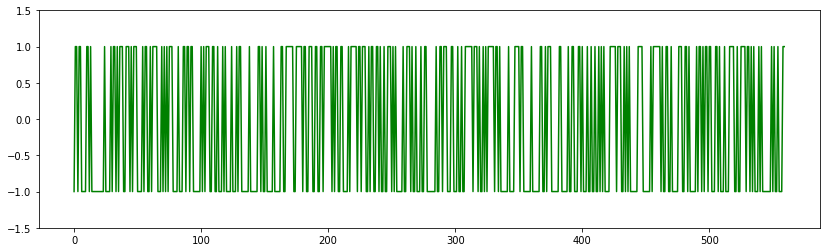

In [8]:
plt.plot(seq, 'green')
plt.ylim([-1.5,1.5])
plt.show()

## Build pulse-train

In [9]:
def psi(t, T):
    return np.sinc(t/T)/np.sqrt(T)

In [10]:
t = np.arange(n_max)

signal = transmitter.w(t, seq, psi, T)
print(f"Min : {min(signal):.4f}\tMax :  {max(signal):.4f}\tNbElem: {len(signal)}")
signal

Min : -0.0345	Max :  0.0397	NbElem: 60000


array([-0.02236068, -0.02235652, -0.02235234, ..., -0.02232022,
       -0.02233374, -0.02234723])

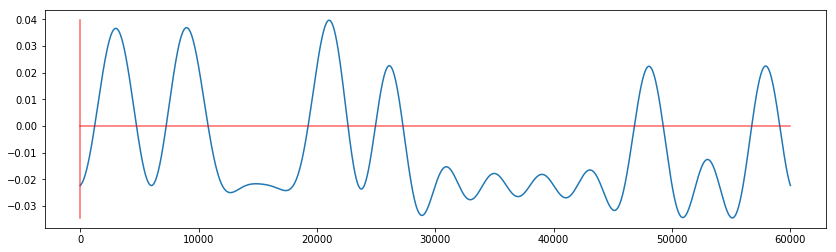

In [11]:
plt.plot(t, signal)
plt.plot([0,0], [min(signal), max(signal)], 'red', alpha=0.6)
plt.plot([min(t), max(t)], [0,0], 'red', alpha=0.6)
plt.show()

In [12]:
# Write it to file
np.savetxt('input.txt', signal)

# Pass signal through the channel

In [13]:
%run client.py

<Figure size 1008x288 with 0 Axes>

# Process result

## Import output of channel

In [14]:
out = np.loadtxt('output.txt')

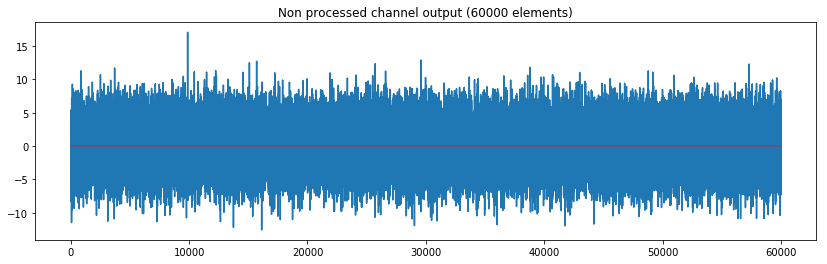

In [15]:
plt.title(f'Non processed channel output ({len(out)} elements)')
plt.plot(t, out)
plt.plot([min(t), max(t)], [0,0], 'red', alpha=0.4)
plt.show()

## Removing wrong index

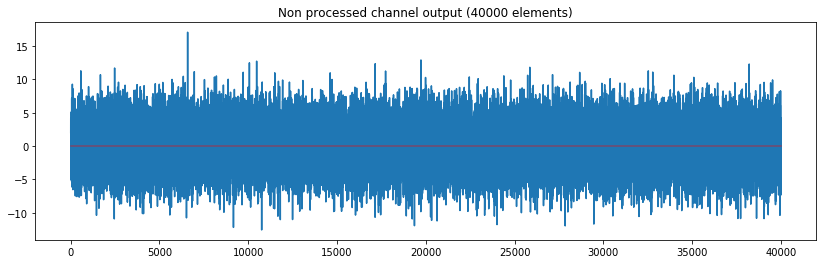

In [16]:
processed, H_hat = receiver.remove_index(out)
t_processed = np.arange(len(processed))

plt.title(f'Non processed channel output ({len(processed)} elements)')
plt.plot(t_processed, processed)
plt.plot([min(t_processed), max(t_processed)], [0,0], 'red', alpha=0.4)
plt.show()

## Performing filtering

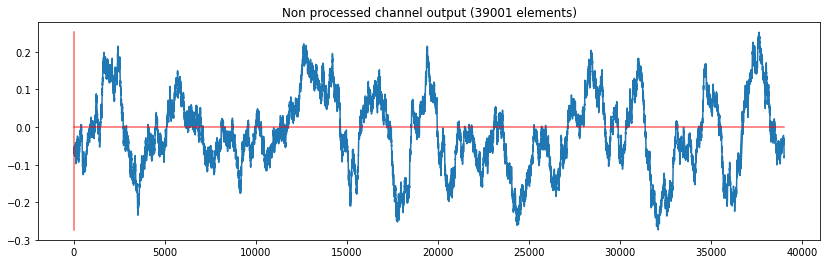

In [17]:
ma_window = 1000
ma = receiver.remove_noise(processed, ma_window)
t_ma = np.arange(len(ma))

plt.title(f'Non processed channel output ({len(ma)} elements)')
plt.plot(t_ma, ma)

plt.plot([0, t_ma[-1]], [0,0], 'red', alpha=0.6)
plt.plot([0,0], [min(ma), max(ma)], 'red', alpha=0.6)
plt.show()

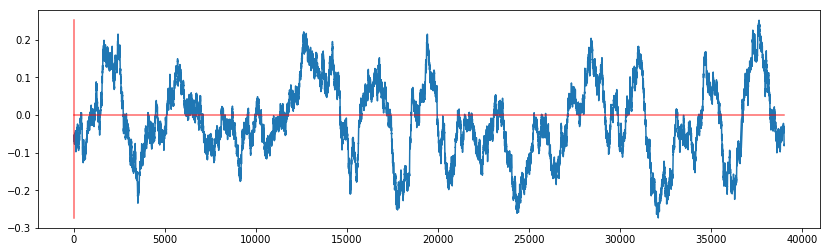

In [18]:
t_recovered = np.arange(len(ma))
y_recovered = np.interp(t_recovered, t_recovered, ma)
plt.plot(t_recovered, y_recovered)
plt.plot([0, t_recovered[-1]], [0,0], 'red', alpha=0.6)
plt.plot([0,0], [min(y_recovered), max(y_recovered)], 'red', alpha=0.6)
plt.show()

# Compare with original message

Result of decoding so far must be in string in the variable "result".

In [19]:
original_message = None
with open(clear_message_filename, 'rb') as f:
    original_message = f.read().decode(ENCODING).strip()
print(original_message.encode(ENCODING))

b'6\r\x00\x08-9kBeq+B\x1b0\x15f"B\x16\x02\x03$\x08\x19|}N3?,a>n,i\x1d NHL\x027\x0c$~tWm\x01\x07X\x08\x0c\\\x06\x04c"$T\x1f9(\x0f\x01?& s Zl4#d{(P\n#'


In [20]:
if original_message:
    print("Original message was: '", original_message, "'", sep='')

    errors = dict()
    for i in range(len(original_message)):
        if original_message[i] != result[i]:
            errors[i] = {'original': original_message[i], 'decoded': result[i] }

    print(f"Total number of errors: {len(errors)}")
    for i, e in errors.items():
        print(f' - index {i}:')
        print('\texpected this: {0:08b}'.format(ord(e["original"])), end='')
        print(f' -> {e["original"].encode("utf-8")} -> {e["original"]}')
        print('\tand got this : {0:08b}'.format(ord(e["decoded"])), end='')
        print(f' -> {e["decoded"].encode("utf-8")} -> {e["decoded"]}')

 -9kBeq+B0f"B$|}N3?,a>n,i NHL7$~tWmX\c"$T9(?& s Zl4#d{(P
#'


NameError: name 'result' is not defined